In [34]:
from __future__ import annotations

import os
from abc import ABCMeta, abstractmethod
from dataclasses import dataclass
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

PATH_TO_FILE = os.path.join(
    os.getcwd(), "artificial_intelligence", "hw4", "starter", "data1.csv"
)


@dataclass
class LinearBase(metaclass=ABCMeta):
    """Abstract Base class representing the Linear Model"""

    @abstractmethod
    def fit(self) -> object:
        pass

    @abstractmethod
    def predict(self) -> Optional[np.ndarray]:
        pass

    def make_polynomial(
        self, X: np.ndarray, degree: int, bias: bool
    ) -> np.ndarray:
        pf = PolynomialFeatures(degree=degree, include_bias=bias)
        return pf.fit_transform(X)

    def reg_plot(self, X: np.ndarray, y: np.ndarray, diagnostics):
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y)
        # sort by design matrix -- needed for matplotlib
        sorted_values = iter(
            sorted(
                zip(X.flatten(), diagnostics.predictions),
                key=itemgetter(0),
            )
        )
        X, pred = zip(*sorted_values)
        plt.plot(X, pred, "m-")
        plt.title("Regression Plot")


@dataclass
class NeuralBase(LinearBase):
    """Abstract Base class representing a Neural Network"""

    def net_input(self, X: np.ndarray, thetas: np.ndarray) -> np.ndarray:
        """Computes the net input vector
        z = w1x1 + w2x2 + ... + wpxp := w'x

        Parameters
        ----------
        X : np.ndarray, shape={n_samples, p_features}
            design matrix
        thetas : np.ndarray, shape={p_features + intercept}
            weights of neural classifier, w vector above
            assumes first element is the bias unit i.e intercept

        Returns
        -------
        np.ndarray
            linear transformation
        """
        return X @ thetas


@dataclass
class Perceptron(NeuralBase):
    """Implements the Perceptron Learning Algorithm"""

    def __init__(self, eta: float = 0.01, niter: int = 50, bias: bool = True):
        self.eta = eta
        self.niter = niter
        self.bias = bias
        self.errors = None
        self.thetas = None
        self.degree = 1

    def fit(self, X: np.ndarray, y: np.ndarray) -> Perceptron:
        """fits training data

        Parameters
        ----------
        X : np.ndarray, shape=(n_samples, p_features)
            n_samples is number of instances i.e rows
            p_features is number of features (dimension of data)
        y : np.ndarray
            response variable

        Returns
        -------
        Perception
            object with fitted parameters
        """
        # Add bias unit to design matrix
        degree, bias = self.degree, self.bias
        X = self.make_polynomial(X, degree, bias)

        # Generate small random weights
        self.thetas = np.random.rand(X.shape[1])
        self.errors = np.zeros(self.niter)
        weights = {}

        for index in range(self.niter):
            # Count total misclassifications in each iteration
            count = 0

            # Iterate through each example and identify misclassifications
            # Number of errors must decline after each iteration
            for xi, target in zip(X, y):
                # make prediction
                yhat = self.predict(xi)

                # update weights if there are misclassifications
                if target * yhat <= 0:
                    self.thetas += self.eta * (target - yhat) * xi
                    count += 1
            # updated weight per iteration
            weights[index] = self.thetas.copy()
            # store count of errors in each iteration
            self.errors[index] = count
        
        self.weights = pd.DataFrame.from_dict(weights, orient='index', columns=['bias', 'coef1', 'coef2'])
        return self

    def predict(
        self, X: np.ndarray, thetas: Optional[np.ndarray] = None
    ) -> np.ndarray:
        """Activation function to determine if neuron should fire or not

        Parameters
        ----------
        X : np.ndarray
            design matrix that includes the bias
        thetas : Union[np.ndarray, None], optional
            weights from fitting, by default None

        Returns
        -------
        np.ndarray
            predictions
        """
        if thetas is None and self.thetas is None:
            raise ValueError(
                "Empty weights provided, either call fit() first or provide \
                    weights"
            )
        elif thetas is None:
            return 1 if self.net_input(X, self.thetas) >= 0 else -1
        return 1 if self.net_input(X, thetas) >= 0 else -1

    def plot_misclassifications(self) -> None:
        """Plots the misclassifications given number of iterations
        Requires call to fit() first, otherwise raise appropriate error

        Raises
        ------
        AttributeError
            if fit() has not been called
        """
        if self.errors is None:
            raise AttributeError(
                "Must call fit() first before plotting \
                    misclassifications"
            )
        # plot the errors
        plt.plot(range(1, self.niter + 1), self.errors, marker="o")
        plt.xlabel("Iterations")
        plt.ylabel("# of misclassifications")
        plt.grid()
        plt.show()
    
    def draw_boundary(self, X):
        bias, w0, w1 = self.thetas
        x1 = X[:, 0].copy()
        x2 = -w1/w0 * x1 + bias
        return x2


"""YOUR CODE GOES HERE"""
pla = Perceptron(eta=0.1)
data = np.genfromtxt('data1.csv', delimiter=",");
X, y = data[:, :2], data[:, 2]
_ = pla.fit(X, y);
pla.weights.to_csv("results1.csv")




'YOUR CODE GOES HERE'

$\theta$

In [36]:
pla.weights.head()

,bias,coef1,coef2
0,0.653175,0.678283,0.065254
1,1.053175,1.278283,1.865254
2,1.253175,0.478283,-0.134746
3,1.653175,1.078283,1.665254
4,2.053175,0.478283,1.865254


In [44]:
def plot_data(inputs, targets, weights):
    plt.figure(figsize=(10, 6))
    plt.grid(True)

    for input, target in zip(inputs, targets):
        plt.plot(input[0], input[1], 'ro' if (target==1.0) else 'bo')
    
    for i in np.linspace(np.amin(inputs[:, :1]), np.amax(inputs[:, :1])):
        slope = -weights[1] / weights[2]
        intercept = -weights[0] / weights[2]
        y = (slope * i) + intercept
        plt.plot(i, y, 'ko')

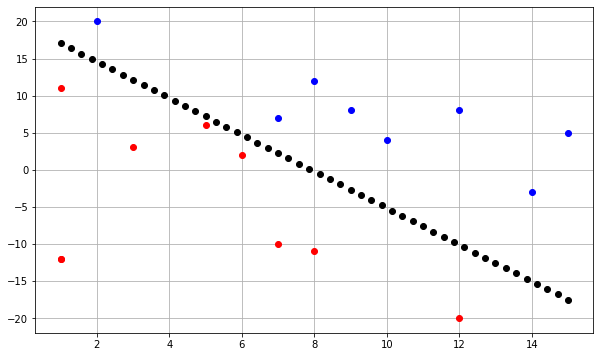

In [45]:
plot_data(X, y, pla.thetas)

In [47]:
np.amax(X[:, :1])

15.0

In [49]:
x = np.array([4, 5, 6])

In [11]:
X @ pla.thetas

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [50]:
(3, 4, *x)

(3, 4, 4, 5, 6)

In [51]:
x

array([4, 5, 6])